# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [5]:
path = kagglehub.dataset_download("ziya07/student-physical-education-performance")

print("Path to dataset files:", path)

NameError: name 'kagglehub' is not defined

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [23]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.cluster import KMeans



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [5]:
student = pd.read_csv('../modul_main/data/student_pe_performance.csv')


In [6]:
student.head()

,ID,Age,Gender,Grade_Level,Strength_Score,Endurance_Score,Flexibility_Score,Speed_Agility_Score,BMI,Health_Fitness_Knowledge_Score,Skills_Score,Class_Participation_Level,Attendance_Rate,Motivation_Level,Overall_PE_Performance_Score,Improvement_Rate,Final_Grade,Previous_Semester_PE_Grade,Hours_Physical_Activity_Per_Week,Performance
0,1,16,Other,10th,46.642153,46.429238,50.363292,51.647608,29.237225,83.467708,62.546020,Medium,79.090405,Medium,71.983935,3.806210,A,B,6.141111,Low Performer
1,2,17,Male,9th,66.690215,66.508482,71.183308,50.508877,21.127816,53.727726,67.261465,High,92.294441,Medium,69.908176,1.651061,B,A,5.055664,Average Performer
2,3,14,Male,12th,47.404086,48.199333,48.805379,51.733417,18.609464,74.009057,55.150633,Medium,91.857339,High,64.822426,4.781953,C,B,6.514409,Average Performer
3,4,16,Other,12th,34.968570,51.506917,56.785577,52.439532,19.391644,68.971793,69.474886,Medium,99.498886,Medium,72.178023,5.068751,A,C,2.916263,Average Performer
4,5,16,Male,12th,47.542569,47.923138,34.064097,47.767977,17.641468,79.322630,57.834987,High,99.640018,Medium,74.755884,5.321179,B,B,9.975924,Average Performer


In [7]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                500 non-null    int64  
 1   Age                               500 non-null    int64  
 2   Gender                            500 non-null    object 
 3   Grade_Level                       500 non-null    object 
 4   Strength_Score                    500 non-null    float64
 5   Endurance_Score                   500 non-null    float64
 6   Flexibility_Score                 500 non-null    float64
 7   Speed_Agility_Score               500 non-null    float64
 8   BMI                               500 non-null    float64
 9   Health_Fitness_Knowledge_Score    500 non-null    float64
 10  Skills_Score                      500 non-null    float64
 11  Class_Participation_Level         500 non-null    object 
 12  Attendan

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [8]:
student.describe(include='all')

,ID,Age,Gender,Grade_Level,Strength_Score,Endurance_Score,Flexibility_Score,Speed_Agility_Score,BMI,Health_Fitness_Knowledge_Score,Skills_Score,Class_Participation_Level,Attendance_Rate,Motivation_Level,Overall_PE_Performance_Score,Improvement_Rate,Final_Grade,Previous_Semester_PE_Grade,Hours_Physical_Activity_Per_Week,Performance
count,500.000000,500.000000,500,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500,500.000000,500,500.000000,500.000000,500,500,500.000000,500
unique,NaN,NaN,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,3,NaN,NaN,5,5,NaN,3
top,NaN,NaN,Male,11th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High,NaN,High,NaN,NaN,B,B,NaN,Low Performer
freq,NaN,NaN,186,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307,NaN,246,NaN,NaN,199,228,NaN,245
mean,250.500000,15.592000,NaN,NaN,51.039502,50.496833,50.269214,50.316378,21.987494,75.202321,69.159963,NaN,87.399980,NaN,69.280886,4.972284,NaN,NaN,6.080173,NaN
std,144.481833,1.150732,NaN,NaN,9.777656,12.318097,14.463557,9.801020,3.804258,10.563626,14.460874,NaN,7.343206,NaN,9.984417,2.029240,NaN,NaN,2.218608,NaN
min,1.000000,14.000000,NaN,NaN,21.037446,14.943794,4.707318,23.642523,15.000000,45.705513,27.413820,NaN,75.097959,NaN,41.669697,0.000000,NaN,NaN,2.000423,NaN
25%,125.750000,15.000000,NaN,NaN,44.593240,41.957873,41.101047,43.520004,19.438312,67.200605,59.124820,NaN,80.906920,NaN,63.458583,3.498825,NaN,NaN,4.310046,NaN
50%,250.500000,16.000000,NaN,NaN,51.210206,50.218237,50.013001,50.334747,21.797397,75.396251,69.243899,NaN,87.303688,NaN,69.261101,4.975743,NaN,NaN,6.041319,NaN
75%,375.250000,17.000000,NaN,NaN,57.094928,58.529838,60.060432,56.823713,24.416571,82.475131,78.739193,NaN,94.054688,NaN,75.397590,6.445966,NaN,NaN,7.898457,NaN


In [9]:
missing_values = student.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [10]:
# Check for duplicates
duplicates = student[student.duplicated()]
print("Number of duplicate rows:", len(duplicates))


Number of duplicate rows: 0


In [11]:

numerical_features = student.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = student.select_dtypes(include=['object']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['ID', 'Age', 'Strength_Score', 'Endurance_Score', 'Flexibility_Score', 'Speed_Agility_Score', 'BMI', 'Health_Fitness_Knowledge_Score', 'Skills_Score', 'Attendance_Rate', 'Overall_PE_Performance_Score', 'Improvement_Rate', 'Hours_Physical_Activity_Per_Week']
Categorical Features: ['Gender', 'Grade_Level', 'Class_Participation_Level', 'Motivation_Level', 'Final_Grade', 'Previous_Semester_PE_Grade', 'Performance']


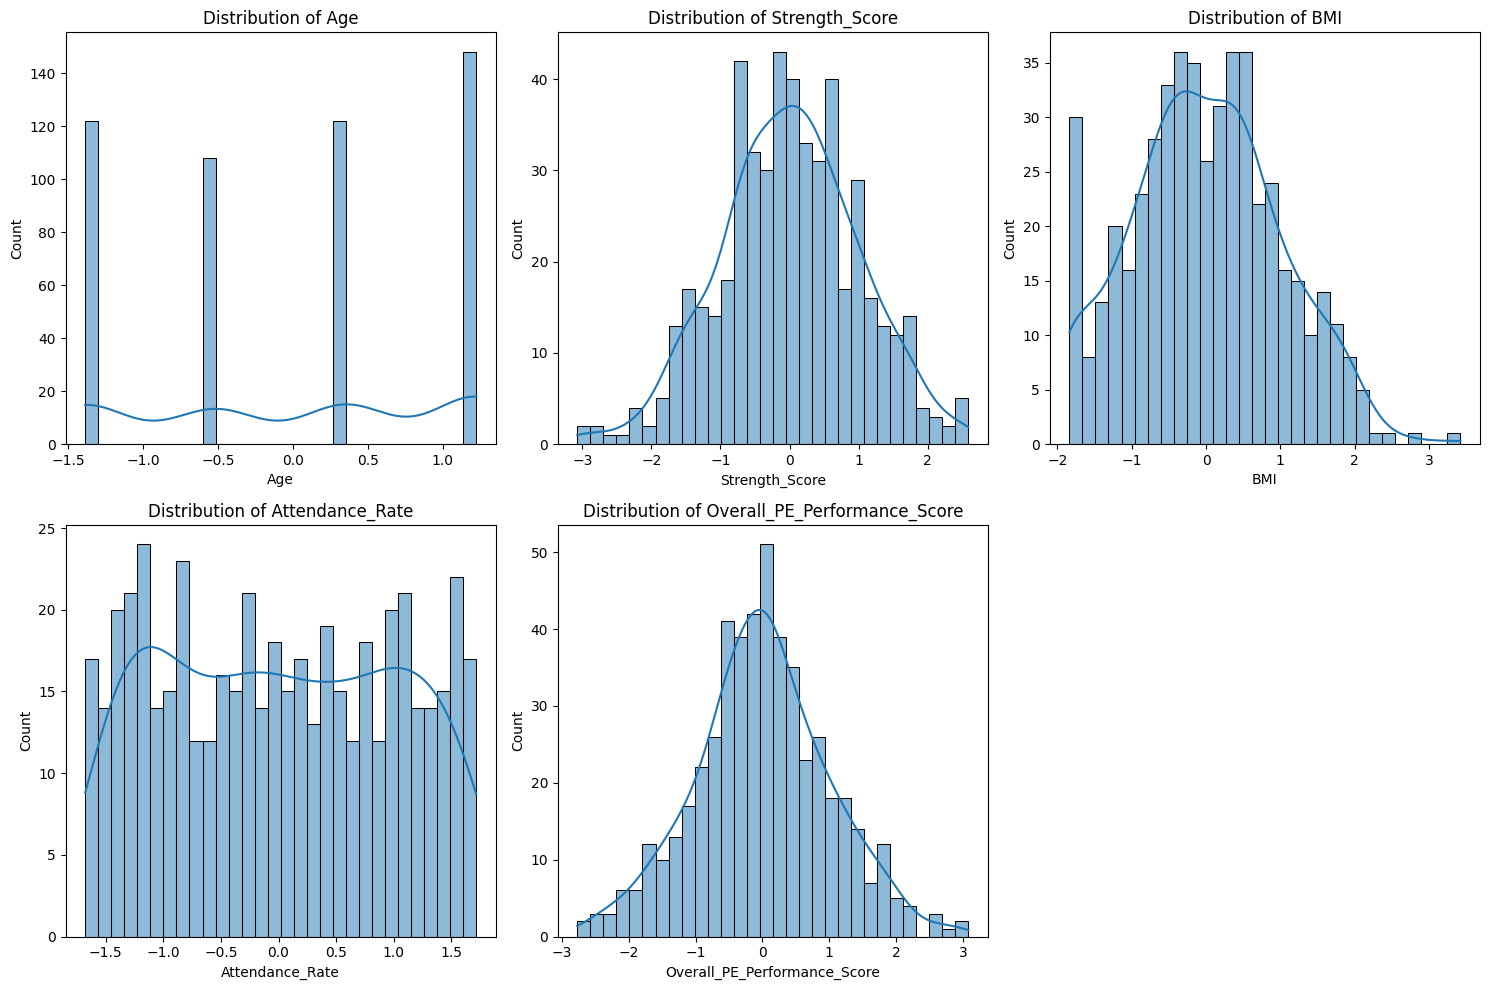

/tmp/ipykernel_6099/3555430076.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student[column], palette='Set2', order=student[column].value_counts().index)
/tmp/ipykernel_6099/3555430076.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student[column], palette='Set2', order=student[column].value_counts().index)
/tmp/ipykernel_6099/3555430076.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=student[column], palette='Set2', order=student[column].value_counts().index)


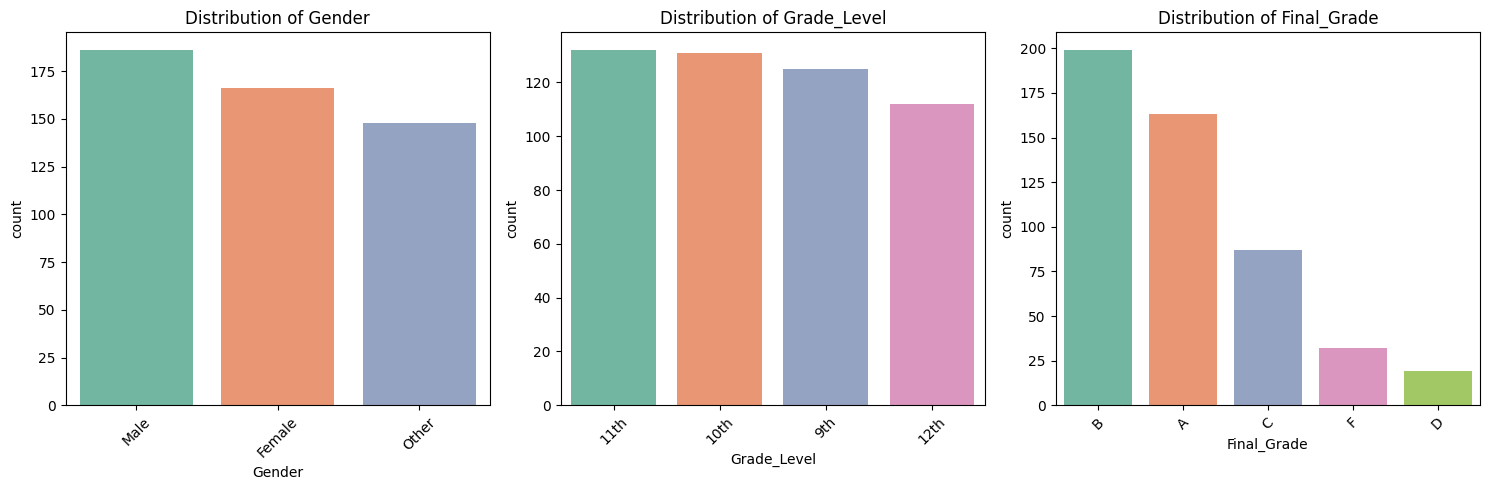

In [30]:
# Kolom numerik untuk visualisasi distribusi
columns_to_plot_numeric = ['Age', 'Strength_Score', 'BMI', 'Attendance_Rate', 'Overall_PE_Performance_Score']

# Kolom kategorikal untuk visualisasi distribusi
columns_to_plot_categorical = ['Gender', 'Grade_Level', 'Final_Grade']

# Plot untuk fitur numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot_numeric, 1):
    plt.subplot(2, 3, i)
    sns.histplot(student[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Plot untuk fitur kategorikal
plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_to_plot_categorical, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=student[column], palette='Set2', order=student[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

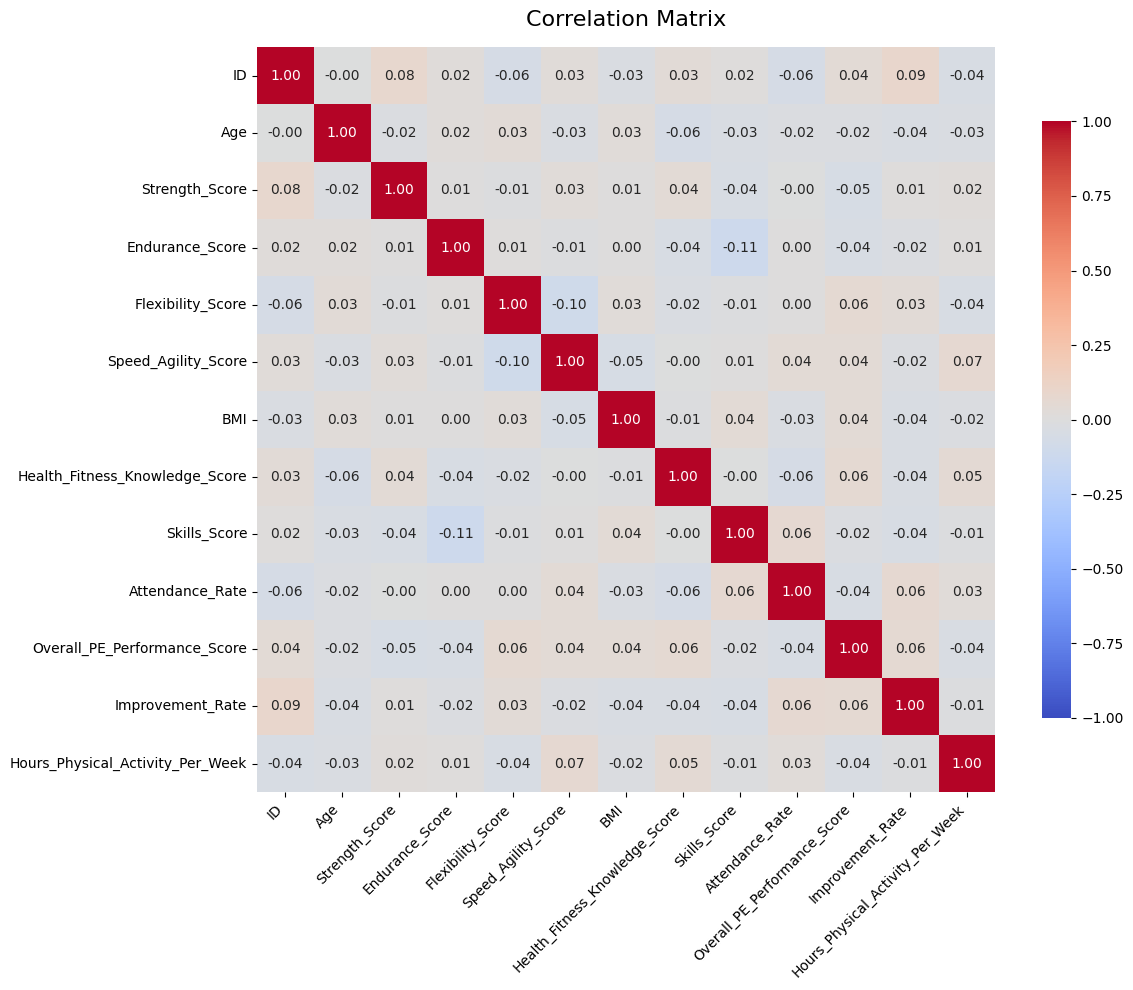

In [34]:
# Memilih hanya kolom numerik
numerical_columns = student.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = student[numerical_columns].corr()

# Visualisasi korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,        # Menampilkan nilai korelasi pada kotak
    fmt=".2f",         # Format desimal
    cmap='coolwarm',   # Skema warna
    vmin=-1, vmax=1,   # Rentang nilai
    cbar_kws={'shrink': 0.8}  # Ukuran bar warna
)
plt.title('Correlation Matrix', fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


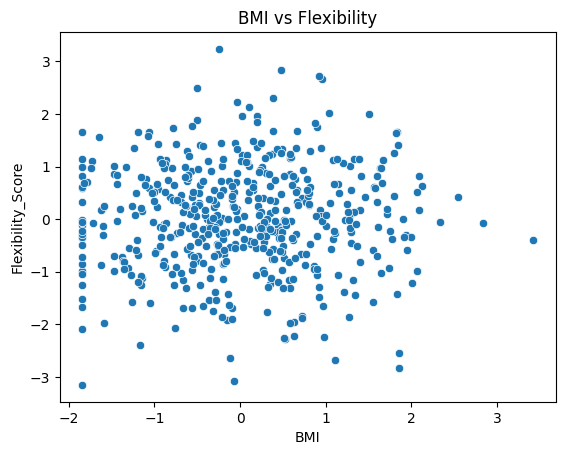

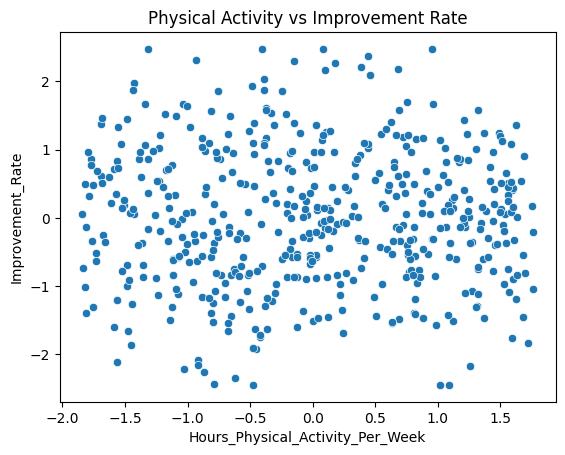

In [35]:
sns.scatterplot(x='BMI', y='Flexibility_Score', data=student)
plt.title('BMI vs Flexibility')
plt.show()

sns.scatterplot(x='Hours_Physical_Activity_Per_Week', y='Improvement_Rate', data=student)
plt.title('Physical Activity vs Improvement Rate')
plt.show()


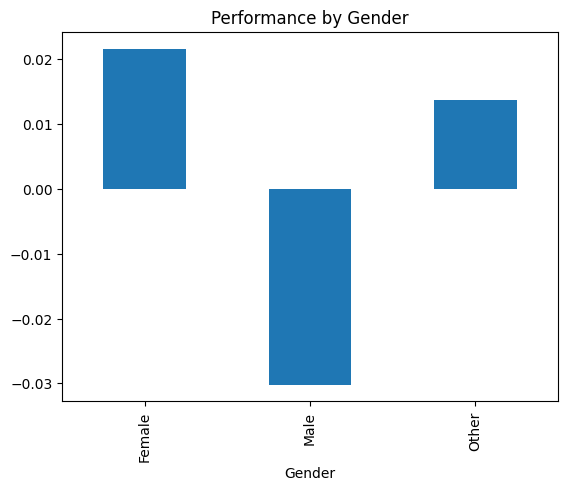

In [36]:
student.groupby('Gender')['Overall_PE_Performance_Score'].mean().plot(kind='bar')
plt.title('Performance by Gender')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Generate box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 6)) 
    sns.boxplot(x=student[feature])  # Now sns is defined
    plt.title(f'Box Plot of {feature}')  
    plt.show()


In [34]:
Q1 = student[numerical_features].quantile(0.25)
Q3 = student[numerical_features].quantile(0.75)
IQR = Q3 - Q1

In [36]:
# Assuming you have calculated Q1, Q3, and IQR for your numerical features

condition = ~((student[numerical_features] < (Q1 - 1.5 * IQR)) | (student[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = student.loc[condition, numerical_features]

# Menggabungkan kembali dengan kolom kategorikal
categorical_features = student.select_dtypes(include=['object']).columns
student = pd.concat([df_filtered_numeric, student.loc[condition, categorical_features]], axis=1)  # Use df_filtered_numeric


In [19]:
scaler = StandardScaler()
student[numerical_features] = scaler.fit_transform(student[numerical_features])

Text(0.5, 1.0, 'Histogram Setelah Standardisasi')

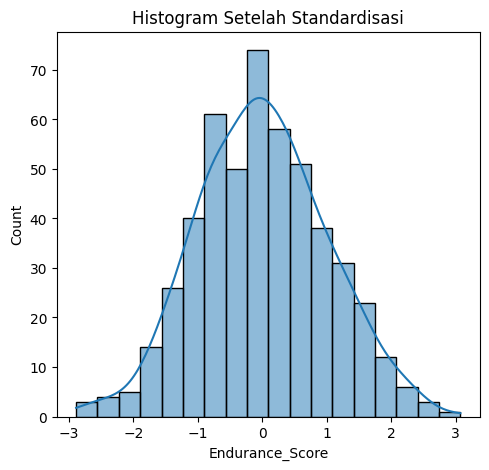

In [25]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(student[numerical_features[3]], kde=True)
plt.title("Histogram Setelah Standardisasi")

In [28]:
categorical_features = student.select_dtypes(include=['object']).columns
student[categorical_features]


,Gender,Grade_Level,Class_Participation_Level,Motivation_Level,Final_Grade,Previous_Semester_PE_Grade,Performance
0,Other,10th,Medium,Medium,A,B,Low Performer
1,Male,9th,High,Medium,B,A,Average Performer
2,Male,12th,Medium,High,C,B,Average Performer
3,Other,12th,Medium,Medium,A,C,Average Performer
4,Male,12th,High,Medium,B,B,Average Performer
...,...,...,...,...,...,...,...
495,Male,10th,High,Low,C,B,Low Performer
496,Male,10th,Medium,High,B,A,Average Performer
497,Male,11th,High,High,B,C,Low Performer
498,Female,10th,Medium,Medium,A,B,Low Performer


In [29]:
df_one_hot = pd.get_dummies(student, columns=categorical_features)
df_one_hot

,ID,Age,Strength_Score,Endurance_Score,Flexibility_Score,Speed_Agility_Score,BMI,Health_Fitness_Knowledge_Score,Skills_Score,Attendance_Rate,...,Final_Grade_D,Final_Grade_F,Previous_Semester_PE_Grade_A,Previous_Semester_PE_Grade_B,Previous_Semester_PE_Grade_C,Previous_Semester_PE_Grade_D,Previous_Semester_PE_Grade_F,Performance_Average Performer,Performance_High Performer,Performance_Low Performer
0,-1.728590,0.354912,-0.450185,-0.330544,0.006511,0.135962,1.907597,0.783222,-0.457826,-1.132734,...,False,False,False,True,False,False,False,False,False,True
1,-1.721662,1.224794,1.602264,1.301149,1.447434,0.019660,-0.226204,-2.034917,-0.131417,0.667197,...,False,False,True,False,False,False,False,True,False,False
2,-1.714734,-1.384853,-0.372181,-0.186701,-0.101310,0.144725,-0.888850,-0.113073,-0.969745,0.607612,...,False,False,False,True,False,False,False,True,False,False
3,-1.707806,0.354912,-1.645285,0.082082,0.450988,0.216843,-0.683037,-0.590400,0.021799,1.649283,...,False,False,False,False,True,False,False,True,False,False
4,-1.700877,0.354912,-0.358003,-0.209145,-1.121532,-0.260274,-1.143555,0.390437,-0.783930,1.668521,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.700877,0.354912,0.880578,-0.433993,-0.614104,1.062080,0.469553,0.233663,-0.344972,1.356262,...,False,False,False,True,False,False,False,False,False,True
496,1.707806,0.354912,1.111317,-0.971764,0.087108,0.162388,1.004803,-0.340522,0.000085,1.444253,...,False,False,True,False,False,False,False,True,False,False
497,1.714734,1.224794,-1.363201,0.372700,1.589449,0.929070,-1.071490,0.331495,0.409057,-1.367086,...,False,False,False,False,True,False,False,False,False,True
498,1.721662,-1.384853,0.505176,1.970902,-1.304984,-1.086854,0.501623,-0.136420,0.983607,0.164012,...,False,False,False,True,False,False,False,False,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [37]:
X = student.drop('Performance', axis=1)  # Drop kolom target dari dataset
y = student['Performance']  # Kolom target

In [40]:
from sklearn.model_selection import train_test_split

# Contoh fitur dan label
X = student.drop('Performance', axis=1)  # Drop kolom target dari dataset
y = student['Performance']  # Kolom target

# Membagi data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Melihat ukuran data setelah splitting
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")


Ukuran X_train: (400, 19)
Ukuran X_test: (100, 19)
Ukuran y_train: (400,)
Ukuran y_test: (100,)


In [42]:
# Menghitung panjang/jumlah data keseluruhan
print("Jumlah data: ", len(X))

# Menghitung panjang/jumlah data pada X_train
print("Jumlah data latih: ", len(X_train))

# Menghitung panjang/jumlah data pada X_test
print("Jumlah data test: ", len(X_test))


Jumlah data:  500
Jumlah data latih:  400
Jumlah data test:  100


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [ ]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.